# GeoSpatial Public Policy Analysis - PyCon 2020
#### A repository containing the materials for the tutorial Geospatial Public Policy Analysis with GeoPandas for PyCon 2020. To be delivered virtually.

<details>
    <summary><strong>Goal</strong></summary>
    The goal of this notebook is to process NCES IPEDS tabular data into an analytical file (subset) that will be used in another notebook to visualize education deserts. 
    <ul>
        <li> Measurable goals for this notebook:</li>
        <li> 1. Identify <i>variables of interest</i> in dataset <strong>processed_data.csv</strong></li>
        <li> 2: Create a <i>working dataset</i> from dataset containing those variables of interest.</li>
    </ul>
</details>

<details>
    <summary><strong>Context</strong></summary>
    We've downloaded raw data from NCES IPEDS <a href="https://nces.ed.gov/ipeds/use-the-data/"><strong>https://nces.ed.gov/ipeds/use-the-data/</strong></a>. It has been pre-processed slightly for the purposes of this workshop. 
    <li>This notebook will create an analytical file to be used in the 01_Data_Visualization notebook.</li>
    <li>The pre-processed masterfile contains coordinates of higher education institutions as well as other institutional characteritics.</li>
    <li>The pre-processed mssterfile also contains graduation rate, demographic, and enrollment statistics.</li>
</details>

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from pathlib import Path
from tools import tree
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

today

'18-Apr-20'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [3]:
tree(PROCESSED_DATA)

+ ../data/processed
    + counties.csv
    + institutional_characteristics.csv
    + processed_data.csv


In [4]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [5]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [6]:
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


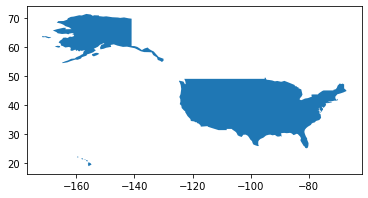

In [7]:
gdf[gdf['name'] == 'United States of America'].plot();

In [15]:
data = pd.read_csv(PROCESSED_DATA / 'institutional_characteristics.csv')

In [16]:
data.head()

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,-99.709797,32.468943,Texas,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,-118.256726,34.146294,California,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,-93.299809,44.855722,Minnesota,99.0,81.0,18.0,Private for-profit,4-year or above


In [30]:
data['share_full-time'] = data['full-time_enrollment'] / data['total_enrollment']

In [31]:
institutions = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['longitude'], data['latitude']))

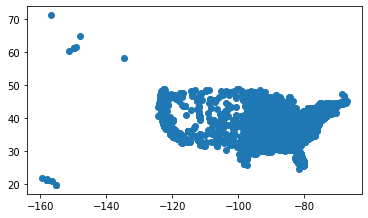

In [32]:
institutions.plot();

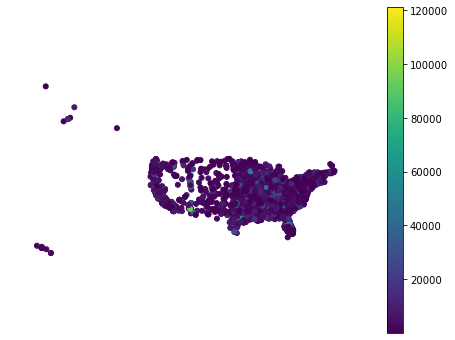

In [23]:
gplt.pointplot(institutions, hue='total_enrollment', legend=True)

In [27]:
usa = gdf[gdf['name'] == 'United States of America']

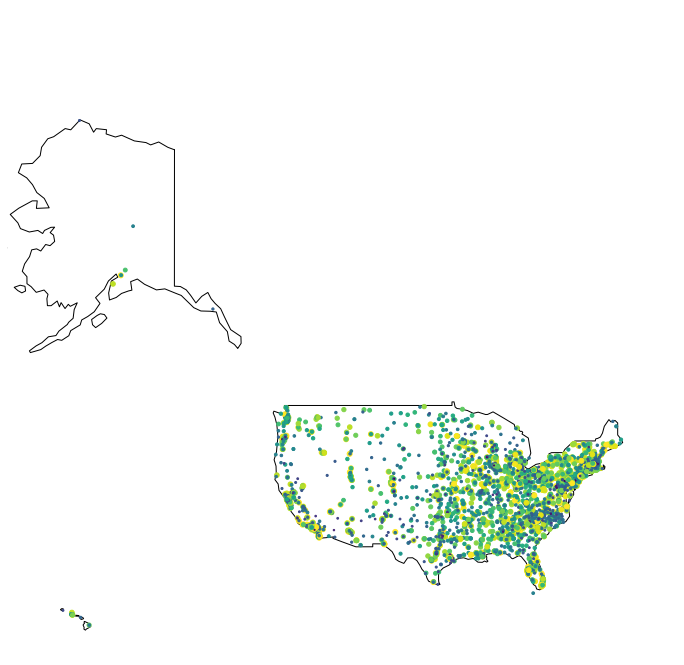

In [35]:
ax = gplt.polyplot(usa, projection=gcrs.WebMercator(), figsize=(12,12))
gplt.pointplot(institutions, hue='share_full-time', legend = False, ax=ax, scale='share_full-time')

DriverError: '../data/external/tl_2019_us_county.zip' not recognized as a supported file format.